In [1]:
import pytesseract
import cv2
from matplotlib import pyplot as plt
import editdistance
import collections

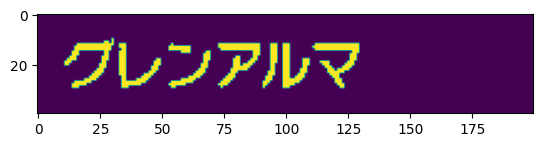

In [5]:
# 日本語名の場合: ケース1

message = cv2.imread("../template_images/labeled_pokemon_name_window_templates/グレンアルマ.png", 0)
threshold_value = 200
max_value = 255
_, message = cv2.threshold(message, threshold_value, max_value, cv2.THRESH_BINARY)
plt.imshow(message)
plt.show()

In [7]:
pytesseract.image_to_string(message, lang="jpn", config='--psm 6 --user-words config/tesseract-pokemon-jpn.user-words')

'グレ ン ア ル マ\n'

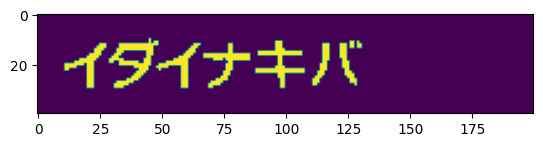

In [8]:
# 日本語名の場合: ケース2

message = cv2.imread("../template_images/labeled_pokemon_name_window_templates/イダイナキバ.png", 0)
threshold_value = 200
max_value = 255
_, message = cv2.threshold(message, threshold_value, max_value, cv2.THRESH_BINARY)
plt.imshow(message)
plt.show()

In [9]:
pytesseract.image_to_string(message, lang="jpn", config='--psm 6')

'イダ イナ キバ\n'

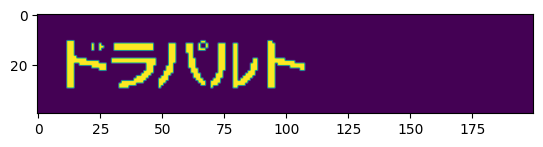

In [18]:
# 日本語名の場合: ケース3

message = cv2.imread("../template_images/labeled_pokemon_name_window_templates/ドラパルト.png", 0)
threshold_value = 200
max_value = 255
_, message = cv2.threshold(message, threshold_value, max_value, cv2.THRESH_BINARY)
plt.imshow(message)
plt.show()

In [19]:
pytesseract.image_to_string(message, lang="jpn", config='--psm 6')

'ドラパルト\n'

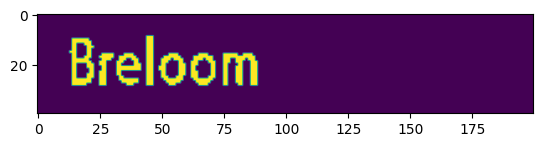

In [20]:
# 英語名の場合

message = cv2.imread("../template_images/labeled_pokemon_name_window_templates/キノガッサ_英語.png", 0)
threshold_value = 200
max_value = 255
_, message = cv2.threshold(message, threshold_value, max_value, cv2.THRESH_BINARY)
plt.imshow(message)
plt.show()

In [22]:
pytesseract.image_to_string(message, lang="eng", config='--psm 6')

'Breloom\n'

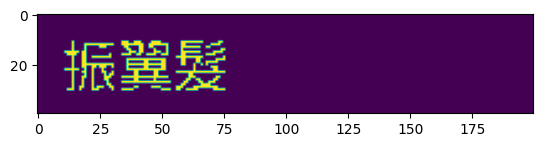

In [23]:
# 中国語名の場合

message = cv2.imread("../template_images/labeled_pokemon_name_window_templates/ハバタクカミ_中国語.png", 0)
threshold_value = 200
max_value = 255
_, message = cv2.threshold(message, threshold_value, max_value, cv2.THRESH_BINARY)
plt.imshow(message)
plt.show()

In [26]:
pytesseract.image_to_string(message, lang="chi_sim", config='--psm 6')

'振 翼 髻\n'

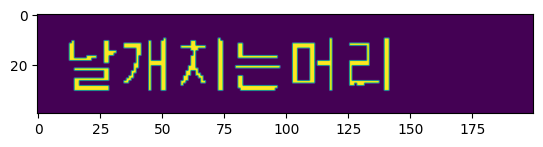

In [28]:
# 韓国語名の場合

message = cv2.imread("../template_images/labeled_pokemon_name_window_templates/ハバタクカミ_韓国語1.png", 0)
threshold_value = 200
max_value = 255
_, message = cv2.threshold(message, threshold_value, max_value, cv2.THRESH_BINARY)
plt.imshow(message)
plt.show()

In [29]:
pytesseract.image_to_string(message, lang="kor", config='--psm 6')

'날 개 치 는 머 리\n'

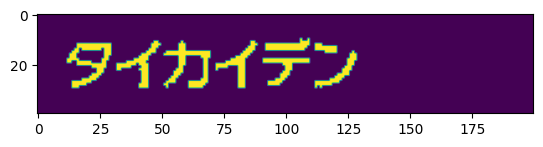

In [11]:
message = cv2.imread("../template_images/labeled_pokemon_name_window_templates/タイカイデン.png", 0)
threshold_value = 200
max_value = 255
_, message = cv2.threshold(message, threshold_value, max_value, cv2.THRESH_BINARY)
plt.imshow(message)
plt.show()

In [12]:
pytesseract.image_to_string(message, lang="jpn", config='--psm 6')

'タイ カイ デン\n'

In [106]:
editdistance.eval("タイ力ィデ)", "タイカイデン") / 6

0.5

## 全言語対応の抽出実装

In [32]:
import pandas as pd

multi_lang_names = pd.read_csv("../data/pokemon_name_multi_language.csv")
"""
ja_list = []
fr_list = []
...
"""
ja_list = multi_lang_names["ja"].values.tolist()
en_list = multi_lang_names["en"].values.tolist()
fr_list = multi_lang_names["fr"].values.tolist()
de_list = multi_lang_names["de"].values.tolist()
es_list = multi_lang_names["es"].values.tolist()
it_list = multi_lang_names["it"].values.tolist()
ko_list = multi_lang_names["ko"].values.tolist()
zh_HK_list = multi_lang_names["zh_HK"].values.tolist()
zh_list = multi_lang_names["zh"].values.tolist()

In [84]:
candidate_langs = ["chi_sim", "chi_tra", "eng", "fra", "ita", "jpn", "kor", "spa", "deu_frak"]

def _search_name_by_edit_distance(ja_list, name_list, target):
    target = target.replace("\n", "").replace(" ", "")
    scores = {}
    for idx, _name in enumerate(name_list):
        _score = editdistance.eval(target, _name) / (max(len(_name), len(target)) * 1.00)
        if _score < 0.5:
            scores[ja_list[idx]] = _score
    if len(scores) == 0:
        return None
    min_score_name = min(scores, key=scores.get)
    return min_score_name
    

def extract_pokemon_name_in_battle(image_path):
    message = cv2.imread(image_path, 0)
    threshold_value = 200
    max_value = 255
    _, message = cv2.threshold(message, threshold_value, max_value, cv2.THRESH_BINARY)
    results = []
    for _lang in candidate_langs:
        _name = pytesseract.image_to_string(message, lang=_lang, config='--psm 6')
        if _lang == "chi_sim":
            results.append(_search_name_by_edit_distance(ja_list, zh_list, _name))
        elif _lang == "chi_tra":
            results.append(_search_name_by_edit_distance(ja_list, zh_HK_list, _name))
        elif _lang == "eng":
            results.append(_search_name_by_edit_distance(ja_list, en_list, _name))
        elif _lang == "fra":
            results.append(_search_name_by_edit_distance(ja_list, fr_list, _name))
        elif _lang == "jpn":
            results.append(_search_name_by_edit_distance(ja_list, ja_list, _name))
        elif _lang == "kor":
            results.append(_search_name_by_edit_distance(ja_list, ko_list, _name))
        elif _lang == "spa":
            results.append(_search_name_by_edit_distance(ja_list, es_list, _name))
        elif _lang == "deu_frak":
            results.append(_search_name_by_edit_distance(ja_list, de_list, _name))
        else:
            continue
    results_exclude_None = [v for v in results if v is not None]
    if len(results_exclude_None) == 0:
        return None
    _counter = collections.Counter([v for v in results if v is not None])
    _most_common_name = _counter.most_common()
    return _most_common_name[0][0]

In [80]:
extract_pokemon_name_in_battle("../template_images/labeled_pokemon_name_window_templates/ハバタクカミ_韓国語1.png")

'ハバタクカミ'

In [81]:
extract_pokemon_name_in_battle("../template_images/labeled_pokemon_name_window_templates/イダイナキバ_中国語2.png")

'イダイナキバ'

In [82]:
extract_pokemon_name_in_battle("../template_images/labeled_pokemon_name_window_templates/ヘイラッシャ_英語.png")

'ヘイラッシャ'

In [98]:
extract_pokemon_name_in_battle("../template_images/unknown_pokemon_name_window_templates/1679873966.676904.png")

'タイカイデン'